In [1]:
import episcanpy as epi
import anndata as ad 
import scanpy as sc

In [2]:
adata = epi.read_mtx("/mnt/lugli/spuccio/Episcanpy/TME/GSE129785_scATAC-TME-TCells.mtx")

In [3]:
adata

AnnData object with n_obs × n_vars = 580649 × 28274

In [4]:
import pandas as pd
metadata = pd.read_csv("/mnt/lugli/spuccio/Episcanpy/TME/GSE129785_scATAC-TME-TCells.cell_barcodes.txt.gz",sep="\t",
                      header=0)

In [5]:
metadata.shape

(28274, 9)

In [6]:
adata = adata.T

In [7]:
metadata

,UMAP1,UMAP2,Clusters,Group,depth,FRIP,Barcodes,Internal_Name,Group_Barcode
0,-5.069238,2.901523,Cluster7,SU001_Tcell_Post,5269,0.546973,TATTGCTTCGGATCGC-1,SU001_Tcell_Post_133,SU001_Tcell_Post#TATTGCTTCGGATCGC-1
1,-6.911177,-0.641451,Cluster8,SU001_Tcell_Post,7922,0.688147,TGCACCTTCTGGCGCA-1,SU001_Tcell_Post_134,SU001_Tcell_Post#TGCACCTTCTGGCGCA-1
2,-8.342639,-4.682566,Cluster8,SU001_Tcell_Post,12625,0.697584,ACAGCGCTCTATACCT-1,SU001_Tcell_Post_138,SU001_Tcell_Post#ACAGCGCTCTATACCT-1
3,-4.587214,3.456622,Cluster7,SU001_Tcell_Post,9814,0.693499,GTGATCATCGCTCTAC-1,SU001_Tcell_Post_139,SU001_Tcell_Post#GTGATCATCGCTCTAC-1
4,-7.780084,-3.592078,Cluster8,SU001_Tcell_Post,27605,0.660062,GGTACCGGTACAAATG-1,SU001_Tcell_Post_140,SU001_Tcell_Post#GGTACCGGTACAAATG-1
...,...,...,...,...,...,...,...,...,...
28269,0.636715,-7.320735,Cluster4,SU005_Total_Post,11847,0.220773,CTAACTTGTTGGAGGT-1,SU005_Total_Post_574,SU005_Total_Post#CTAACTTGTTGGAGGT-1
28270,-0.157976,-9.070210,Cluster4,SU005_Total_Post,6248,0.271847,CAAAGCTCACCTCGTT-1,SU005_Total_Post_456,SU005_Total_Post#CAAAGCTCACCTCGTT-1
28271,-3.762721,6.024637,Cluster9,SU005_Total_Post,10705,0.214619,GGGAACATCTCGCGTT-1,SU005_Total_Post_589,SU005_Total_Post#GGGAACATCTCGCGTT-1
28272,-3.294715,1.662023,Cluster9,SU005_Total_Post,6655,0.282119,AGCGTATAGCAGGAGG-1,SU005_Total_Post_596,SU005_Total_Post#AGCGTATAGCAGGAGG-1


In [8]:
adata.obs = metadata

In [9]:
adata.obs.index = adata.obs['Barcodes']

In [10]:
del adata.obs['Barcodes']

In [11]:
adata.obsm['X_umap'] = adata.obs[['UMAP1','UMAP2']].to_numpy()

In [12]:
del adata.obs['UMAP1']
del adata.obs['UMAP2']

<AxesSubplot:>

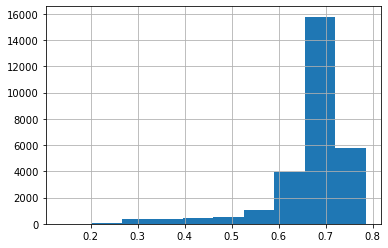

In [13]:
adata.obs['FRIP'].hist()

In [17]:
sc.settings.set_figure_params(dpi=200)

... storing 'Clusters' as categorical
... storing 'Group' as categorical


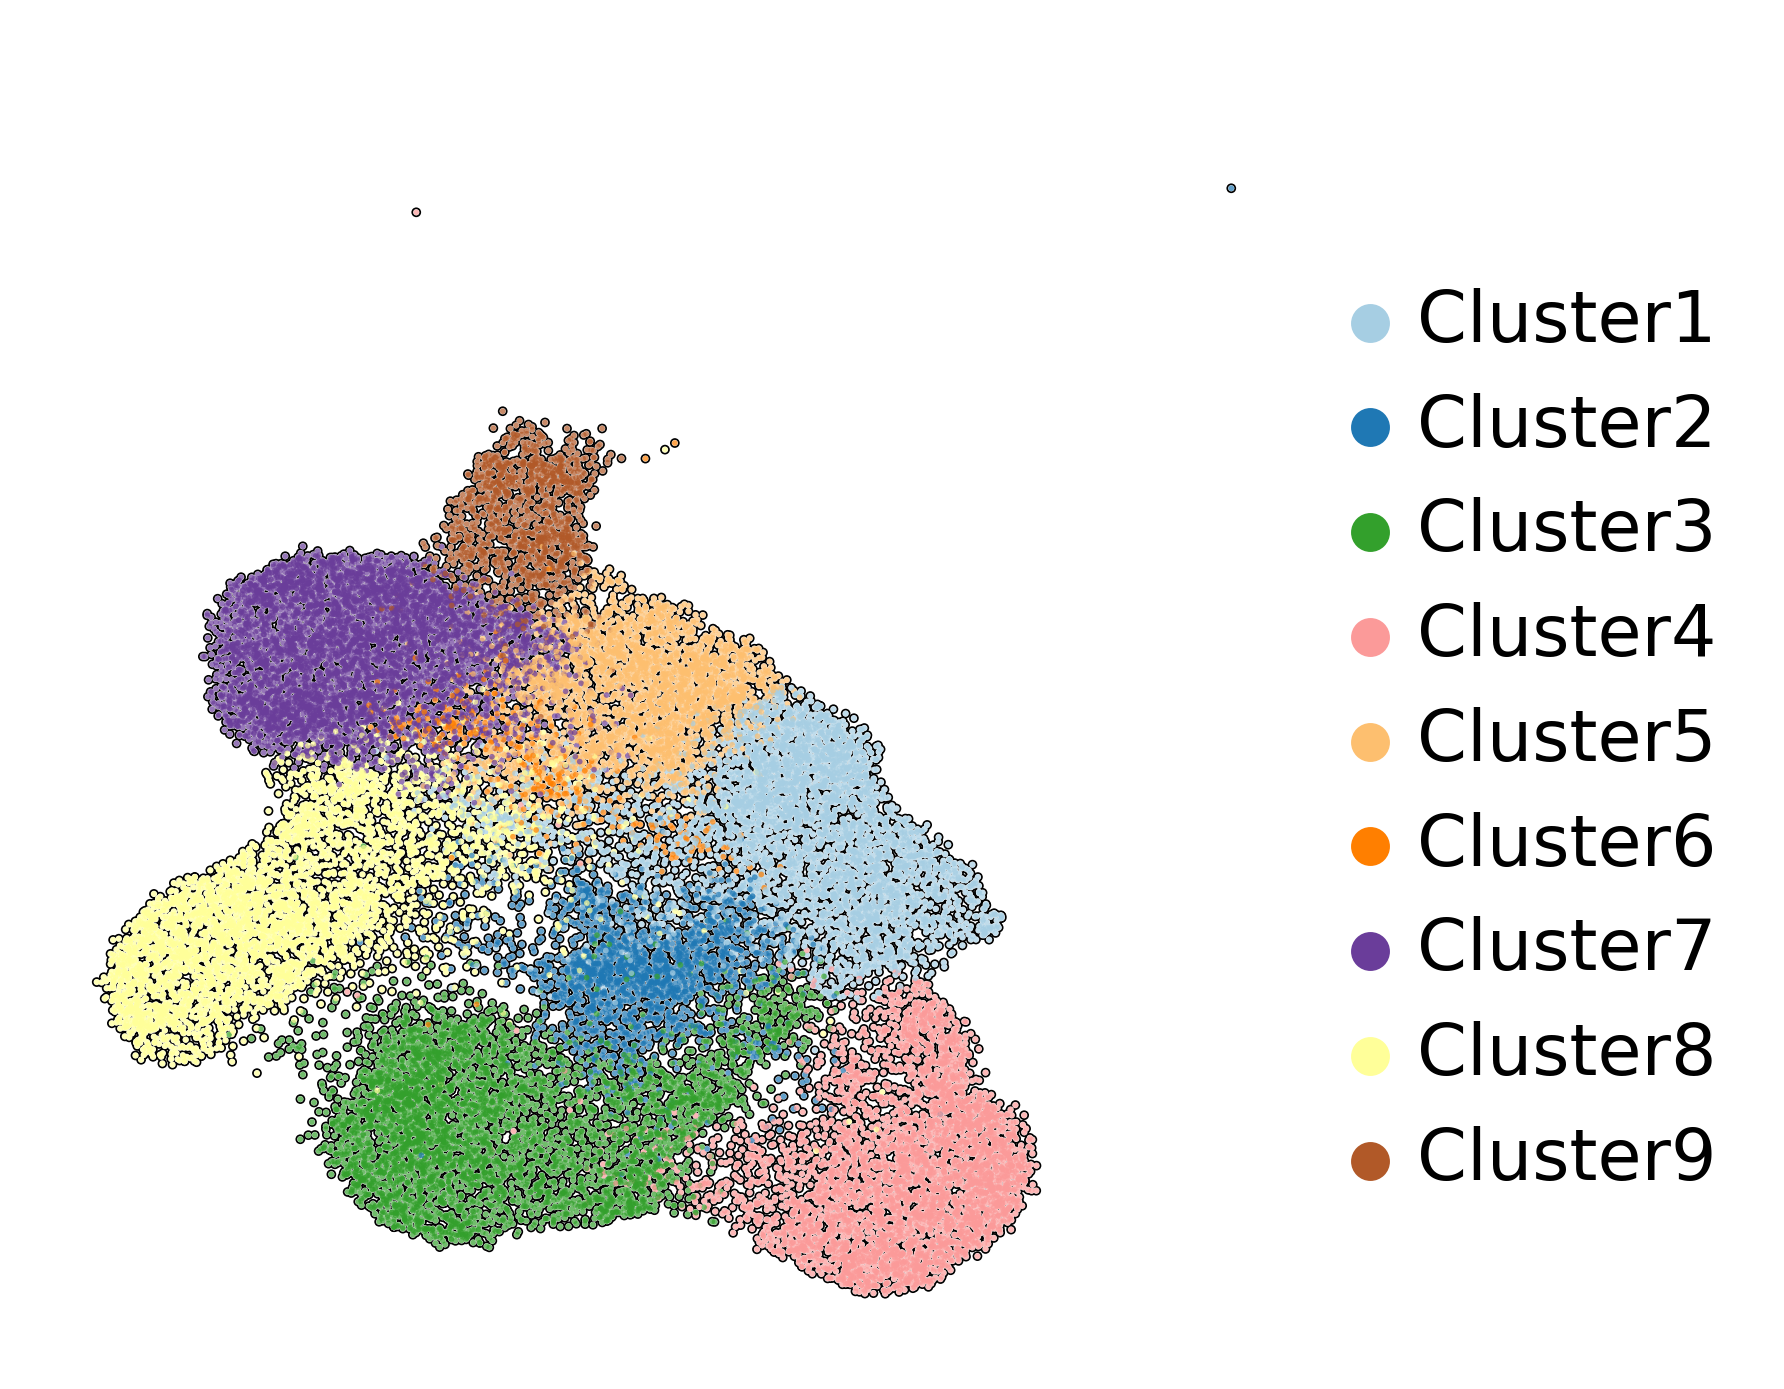

In [18]:
sc.pl.umap(adata, color='Clusters', add_outline=True,legend_fontoutline=1,frameon=False,na_in_legend=False,
               title='   ', palette='Paired')

        Or use epi.pp.density_features.
    
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


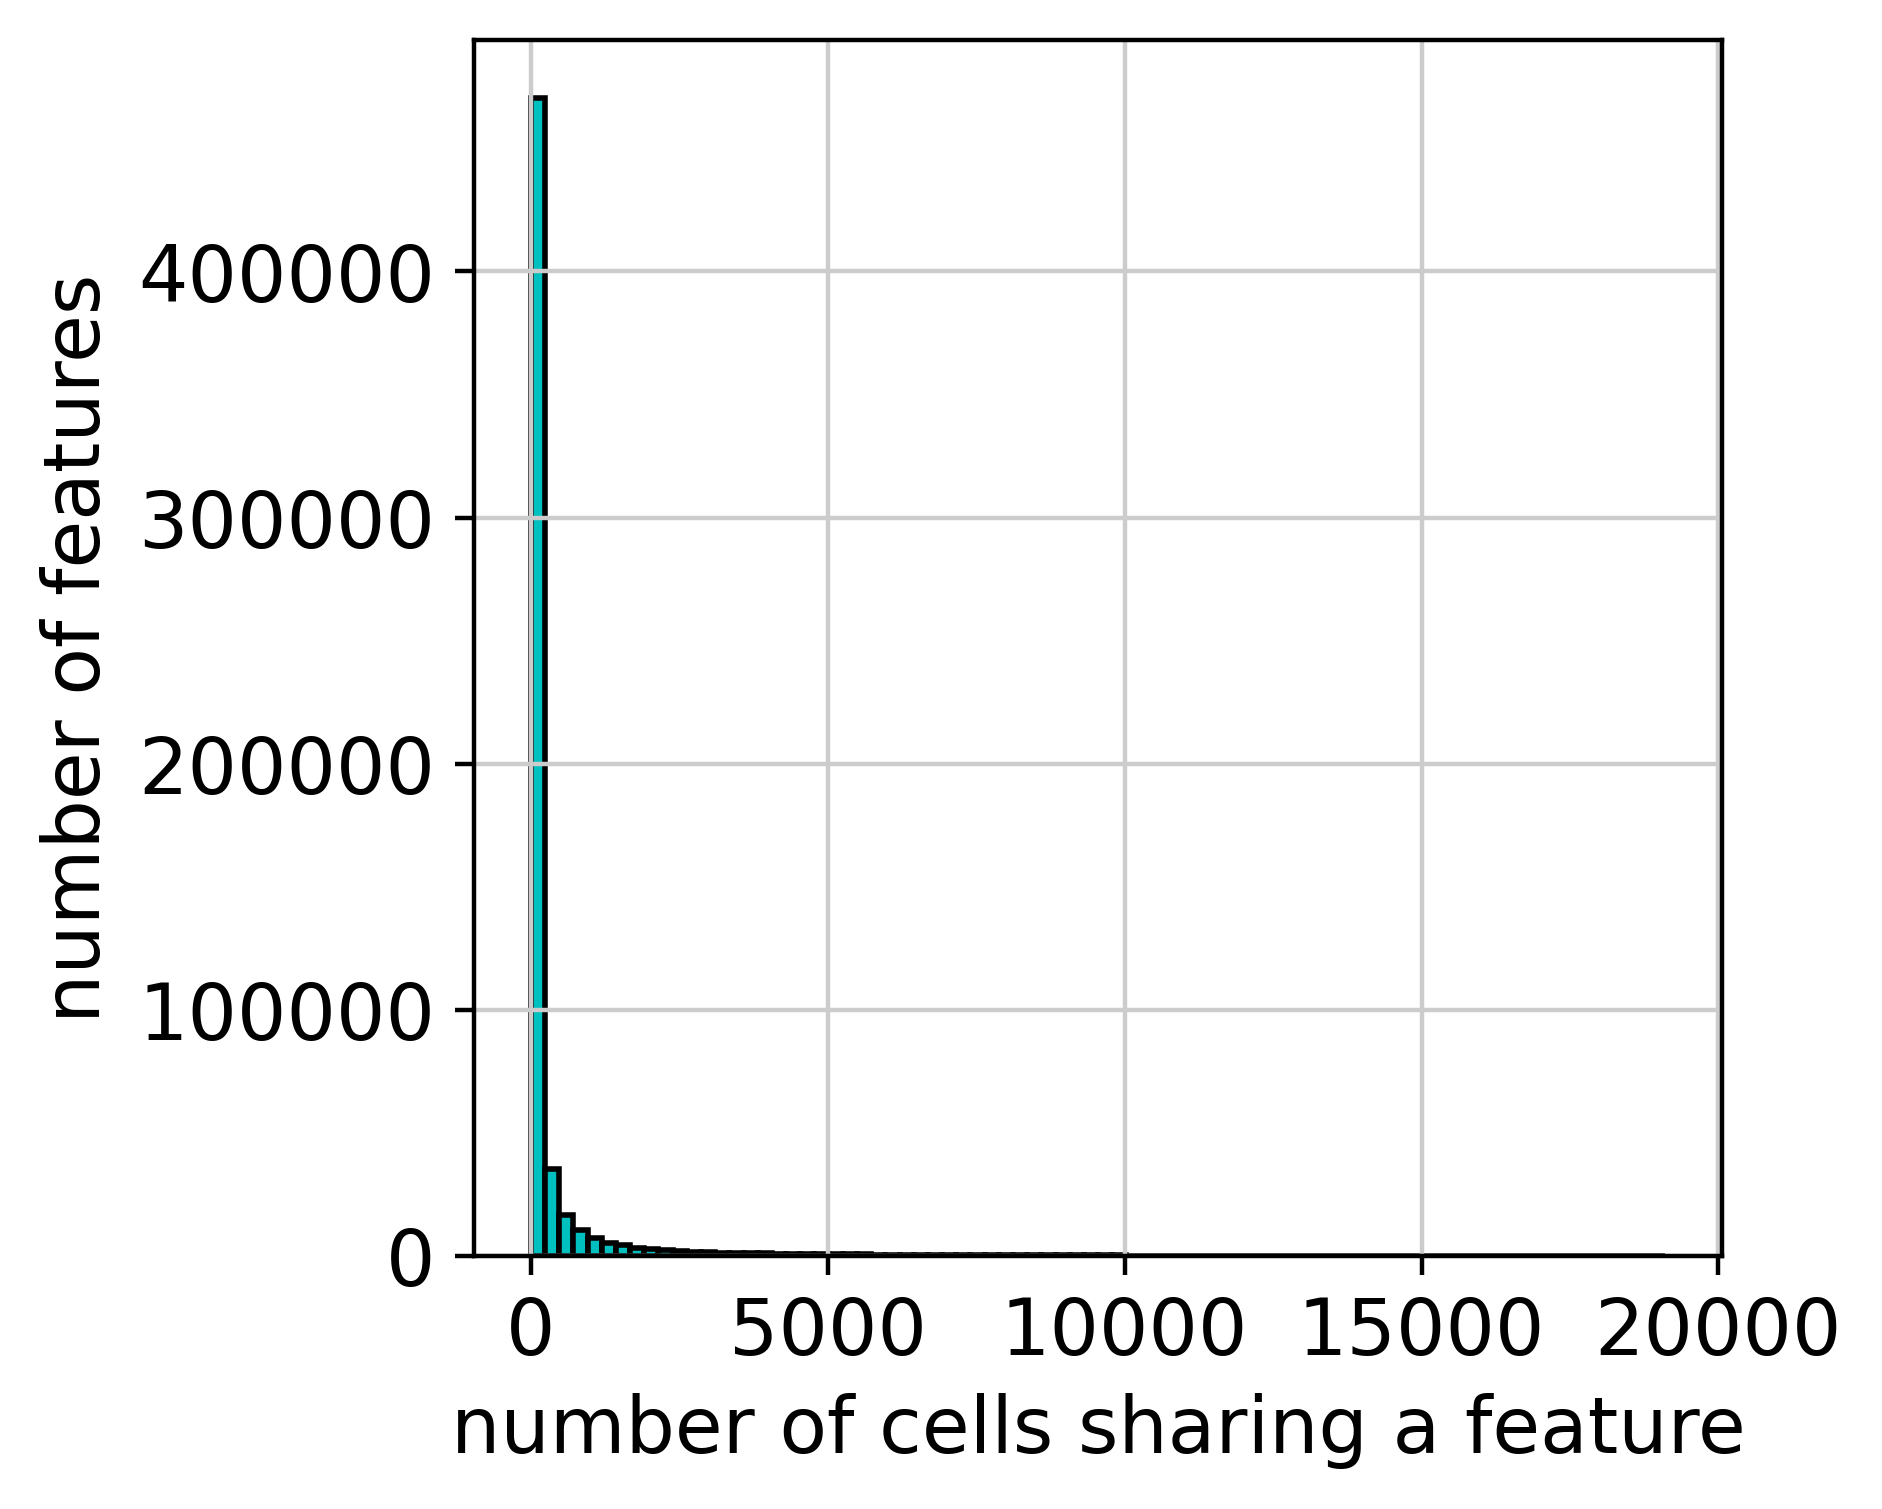

In [19]:
epi.pp.commonness_features(adata)

In [20]:
peaks = pd.read_csv("/mnt/lugli/spuccio/Episcanpy/TME/GSE129785_scATAC-TME-TCells.peaks.txt.gz",sep="\t",header=0)

In [21]:
adata.var.index = peaks['Feature']

In [22]:
# remove any potential empty features or barcodes
epi.pp.filter_cells(adata, min_features=1)
epi.pp.filter_features(adata, min_cells=1)

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


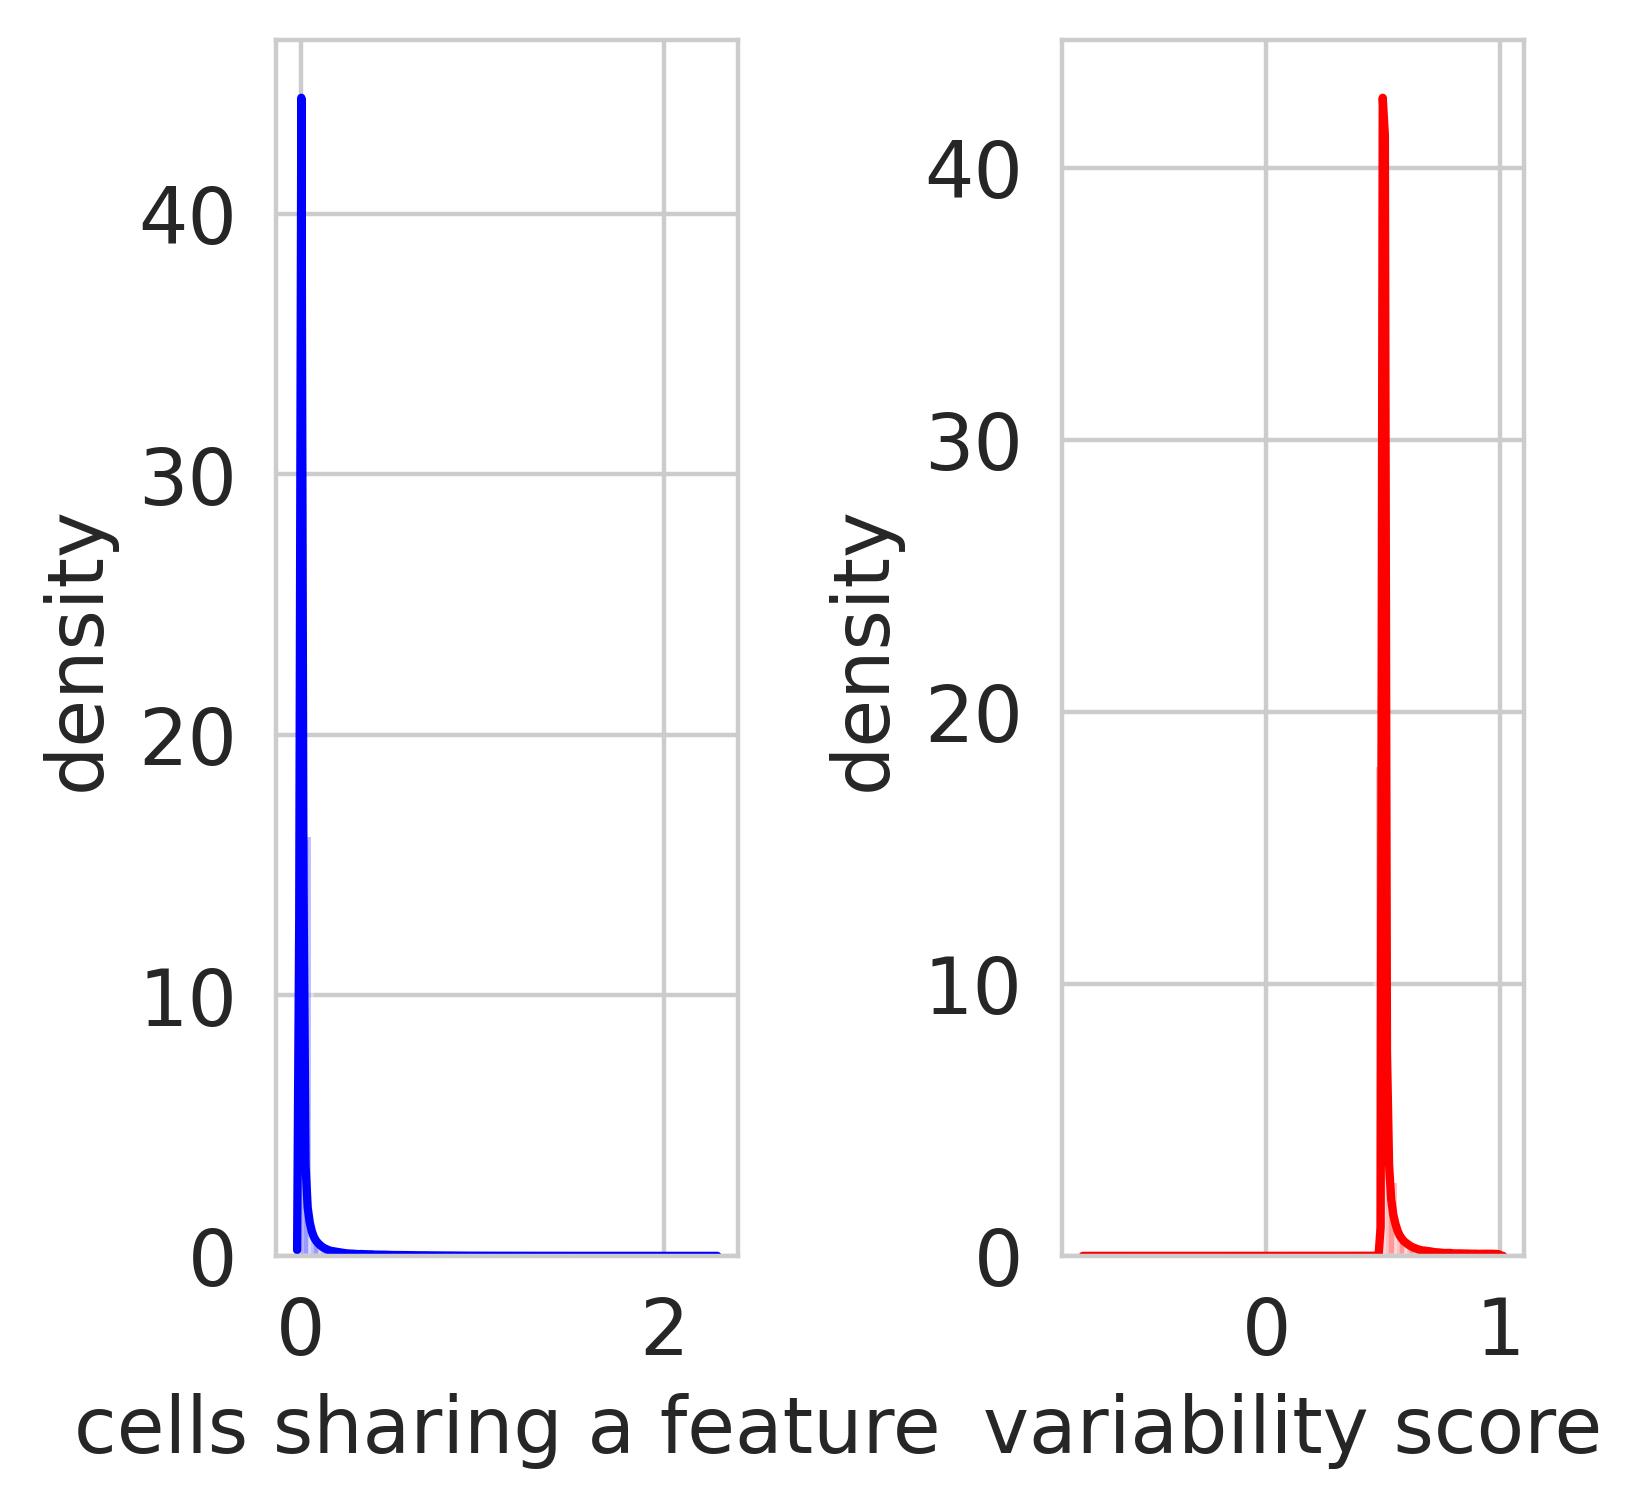

In [23]:
epi.pp.cal_var(adata)

In [24]:
adata.X.A

array([[2., 0., 0., ..., 0., 0., 0.],
       [2., 0., 0., ..., 0., 0., 0.],
       [0., 2., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [25]:
adata.obs['Group'].value_counts()

SU009_Tcell_Post           6338
SU009_Tcell_Pre            5646
SU001_Tcell_Post           4857
SU008_Tcell_Post           3719
SU008_Tcell_Pre            2874
SU001_Tcell_Post2          2119
SU006_Tcell_Pre             999
SU007_Total_Post            532
SU001_Total_Post2           468
SU005_Total_Post            297
SU008_Immune_Post            92
SU006_Total_Post             78
SU001_Immune_Post2           76
SU010_Total_Pre              65
SU001_Total_Pre              58
SU010_Total_Post             22
SU009_Tumor_Immune_Post      11
SU008_Immune_Pre              9
SU006_Immune_Pre              6
SU001_Tumor_Immune_Post       3
SU009_Tumor_Immune_Pre        3
SU008_Tumor_Pre               2
Name: Group, dtype: int64

In [26]:
adata.obs['Clusters'].value_counts()

Cluster7    5067
Cluster8    4333
Cluster3    4292
Cluster1    4154
Cluster4    4115
Cluster5    2902
Cluster2    1892
Cluster9    1178
Cluster6     341
Name: Clusters, dtype: int64

In [27]:
metadati_reclusterTcell=  pd.read_csv("/mnt/lugli/spuccio/Episcanpy/ALL/infofile_con_clusters_Tcell.txt",sep="\t",header=0)

In [28]:
#metadati_reclusterTcell.index= metadati_reclusterTcell['Barcodes']

In [29]:
metadati_reclusterTcell

,UMAP1,UMAP2,Clusters,Group,depth,FRIP,Barcodes,Internal_Name,Group_Barcode,T_Cell_Cluster
SU001_Tcell_Post_133,-5.069238,2.901523,Cluster7,SU001_Tcell_Post,5269,0.546973,TATTGCTTCGGATCGC-1,SU001_Tcell_Post_133,SU001_Tcell_Post#TATTGCTTCGGATCGC-1,Cluster14
SU001_Tcell_Post_134,-6.911177,-0.641451,Cluster8,SU001_Tcell_Post,7922,0.688147,TGCACCTTCTGGCGCA-1,SU001_Tcell_Post_134,SU001_Tcell_Post#TGCACCTTCTGGCGCA-1,Cluster16
SU001_Tcell_Post_138,-8.342639,-4.682566,Cluster8,SU001_Tcell_Post,12625,0.697584,ACAGCGCTCTATACCT-1,SU001_Tcell_Post_138,SU001_Tcell_Post#ACAGCGCTCTATACCT-1,Cluster17
SU001_Tcell_Post_139,-4.587214,3.456622,Cluster7,SU001_Tcell_Post,9814,0.693499,GTGATCATCGCTCTAC-1,SU001_Tcell_Post_139,SU001_Tcell_Post#GTGATCATCGCTCTAC-1,Cluster14
SU001_Tcell_Post_140,-7.780084,-3.592078,Cluster8,SU001_Tcell_Post,27605,0.660062,GGTACCGGTACAAATG-1,SU001_Tcell_Post_140,SU001_Tcell_Post#GGTACCGGTACAAATG-1,Cluster17
...,...,...,...,...,...,...,...,...,...,...
SU005_Total_Post_574,0.636715,-7.320735,Cluster4,SU005_Total_Post,11847,0.220773,CTAACTTGTTGGAGGT-1,SU005_Total_Post_574,SU005_Total_Post#CTAACTTGTTGGAGGT-1,Cluster8
SU005_Total_Post_456,-0.157976,-9.070210,Cluster4,SU005_Total_Post,6248,0.271847,CAAAGCTCACCTCGTT-1,SU005_Total_Post_456,SU005_Total_Post#CAAAGCTCACCTCGTT-1,Cluster10
SU005_Total_Post_589,-3.762721,6.024637,Cluster9,SU005_Total_Post,10705,0.214619,GGGAACATCTCGCGTT-1,SU005_Total_Post_589,SU005_Total_Post#GGGAACATCTCGCGTT-1,Cluster12
SU005_Total_Post_596,-3.294715,1.662023,Cluster9,SU005_Total_Post,6655,0.282119,AGCGTATAGCAGGAGG-1,SU005_Total_Post_596,SU005_Total_Post#AGCGTATAGCAGGAGG-1,Cluster13


In [35]:
adata.obs =  pd.merge(pd.DataFrame(adata.obs),metadati_reclusterTcell[['Internal_Name','Barcodes','T_Cell_Cluster']],on="Internal_Name").set_index("Barcodes")

In [36]:
adata_sub = adata[adata.obs['T_Cell_Cluster'].isin(["Cluster8","Cluster9","Cluster10","Cluster11"]),:]

In [37]:
del adata

In [38]:
adata_sub.obs[['PtzID','Time']] = adata_sub.obs['Internal_Name'].str.split('_', 3, expand=True)[[0,2]]

Trying to set attribute `.obs` of view, copying.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


In [39]:
adata_sub.raw = adata_sub

If ``None``, after normalization, each observation (cell) has a total count
    equal to the median of total counts for observations (cells)
    before normalization.

In [40]:
adata_sub.X = adata_sub.X.A

In [41]:
sc.pp.normalize_total(adata_sub)

In [42]:
adata_sub.layers['normalised'] = adata_sub.X.copy()

In [43]:
epi.pp.log1p(adata_sub)

In [44]:
adata_sub.write("/mnt/lugli/spuccio/Episcanpy/TME/TME_sub.h5ad")

... storing 'T_Cell_Cluster' as categorical
... storing 'PtzID' as categorical
... storing 'Time' as categorical


In [46]:
adata_sub.obs['PtzID'].value_counts()

SU009    2023
SU008    1144
SU001     893
SU007     102
SU006      72
SU005      41
SU010       2
Name: PtzID, dtype: int64

In [47]:
mod = {'SU001': 'Responder',
     'SU009': 'Responder',
     'SU005' : 'NonResponder',
     'SU006' :  'NonResponder',
     'SU007': 'NonResponder',
     'SU008' : 'NonResponder',
     'SU010': 'NonResponder'}
adata_sub.obs['Response'] = adata_sub.obs['PtzID'].map(mod).astype('category')

In [49]:
adata_sub.obs['Response'].value_counts()

Responder       2916
NonResponder    1361
Name: Response, dtype: int64

In [51]:
adata_sub.obs['Time_Response'] = adata_sub.obs['Time'].astype("str") + "_" + adata_sub.obs['Response'].astype("str")

In [54]:
adata_sub.obs['Time_Response'].value_counts()

Post_Responder       1619
Pre_Responder         964
Post_NonResponder     892
Pre_NonResponder      469
Post2_Responder       333
Name: Time_Response, dtype: int64

Post2_Responder problem

In [56]:
mod = {'Post_Responder': 'Post_Responder',
     'Pre_Responder': 'Pre_Responder',
     'Post_NonResponder' : 'Post_NonResponder',
     'Pre_NonResponder' :  'Pre_NonResponder',
     'Post2_Responder': 'Post_Responder'}
adata_sub.obs['Time_Response'] = adata_sub.obs['Time_Response'].map(mod).astype('category')

In [57]:
adata_sub.obs['Time_Response'].value_counts()

Post_Responder       1952
Pre_Responder         964
Post_NonResponder     892
Pre_NonResponder      469
Name: Time_Response, dtype: int64

In [75]:
epi.tl.rank_features(adata_sub,groupby="Time_Response",omic='ATAC',use_raw=False,key_added="ByTimeResponse",n_features=None)

In [76]:
pd.DataFrame(adata_sub.uns['ByTimeResponse']['names']).head(50)

,Post_NonResponder,Post_Responder,Pre_NonResponder,Pre_Responder
0,chr18_2627757_2628257,chr8_8085779_8086279,chr1_143913193_143913693,chr9_100854765_100855265
1,chr4_187125358_187125858,chr8_2094333_2094833,chrX_3729910_3730410,chr5_55934707_55935207
2,chr19_40349111_40349611,chr4_124064_124564,chr4_187125358_187125858,chr17_55500031_55500531
3,chr22_20378831_20379331,chr19_21751890_21752390,chr15_22461462_22461962,chr17_41429109_41429609
4,chr10_127855309_127855809,chr5_109422581_109423081,chr9_131383982_131384482,chr2_208030730_208031230
5,chr6_46097454_46097954,chr3_112395550_112396050,chr15_22460958_22461458,chr3_14257672_14258172
6,chr9_131383982_131384482,chr4_52873_53373,chr19_5904256_5904756,chr1_23950847_23951347
7,chr16_72693045_72693545,chr21_47716224_47716724,chr22_20378315_20378815,chr1_234836020_234836520
8,chr22_20378315_20378815,chr19_48713220_48713720,chr9_86594963_86595463,chr11_61595224_61595724
9,chr18_77933232_77933732,chr1_175440072_175440572,chr10_129893666_129894166,chr17_47601010_47601510


In [77]:
result = adata_sub.uns['ByTimeResponse']

In [78]:
groups = result['names'].dtype.names

In [79]:
with pd.ExcelWriter('/mnt/lugli/spuccio/Episcanpy/ALL/ByTimeResponse.xlsx') as writer:
    for _ in range(len(groups)):
        sc.get.rank_genes_groups_df(adata_sub, group=groups[_], key='ByTimeResponse').to_excel(writer, sheet_name=groups[_],index=False)
        sc.get.rank_genes_groups_df(adata_sub, group=groups[_], key='ByTimeResponse',pval_cutoff=0.05).to_excel(writer, sheet_name="".join([groups[_],"_filtered"]),index=False)  


Exception ignored in: <function ZipFile.__del__ at 0x7fcea1343710>
Traceback (most recent call last):
  File "/home/spuccio/anaconda3/envs/episcanpy2/lib/python3.7/zipfile.py", line 1809, in __del__
    self.close()
  File "/home/spuccio/anaconda3/envs/episcanpy2/lib/python3.7/zipfile.py", line 1826, in close
    self.fp.seek(self.start_dir)
ValueError: seek of closed file


In [80]:
epi.tl.rank_features(adata_sub,groupby="Response",omic='ATAC',use_raw=False,key_added="Response",n_features=None)

In [82]:
result = adata_sub.uns['Response']

In [83]:
groups = result['names'].dtype.names

In [ ]:
with pd.ExcelWriter('/mnt/lugli/spuccio/Episcanpy/ALL/Response.xlsx') as writer:
    for _ in range(len(groups)):
        sc.get.rank_genes_groups_df(adata_sub, group=groups[_], key='Response').to_excel(writer, sheet_name=groups[_],index=False)
        sc.get.rank_genes_groups_df(adata_sub, group=groups[_], key='Response',pval_cutoff=0.05).to_excel(writer, sheet_name="".join([groups[_],"_filtered"]),index=False)  

        

In [81]:
adata_sub.write("/mnt/lugli/spuccio/Episcanpy/TME/TME_sub.h5ad")